In [ ]:
!pip install reportlab

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from reportlab.platypus import SimpleDocTemplate, Paragraph, Table, Spacer, TableStyle, Image
from reportlab.lib.styles import getSampleStyleSheet
from reportlab.lib import colors

In [14]:
data = pd.read_csv('prisoner_data.csv')

In [15]:
# Create a PDF document
pdf = SimpleDocTemplate("prisoner_report.pdf")

In [16]:
# Create a list of elements to add to the PDF
elements = []

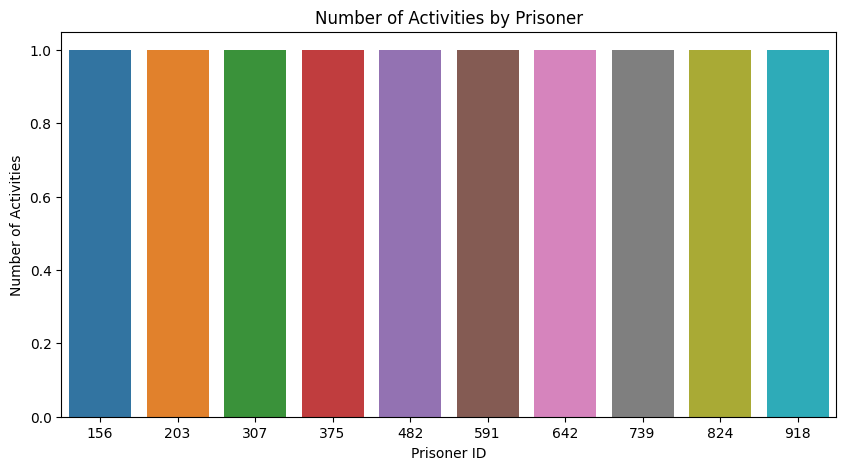

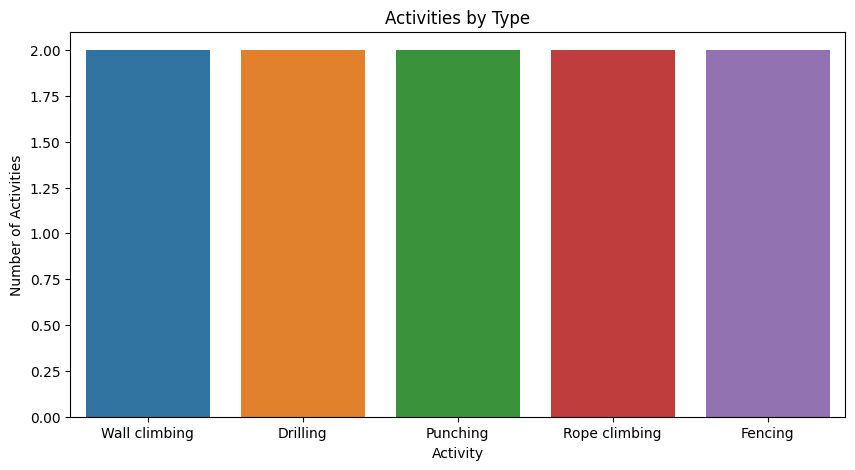

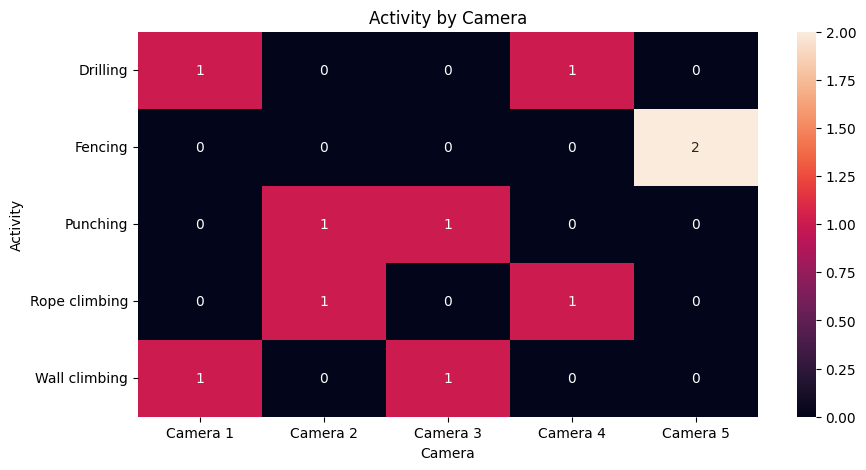

In [19]:
# Add a title
title = Paragraph("Prisoner Activity Report", getSampleStyleSheet()['Heading1'])
elements.append(title)

# Add a spacer
elements.append(Spacer(1, 12))

# Create a table with the prisoner activity data
table_data = [('Time Stamp', 'Prisoner ID', 'Activity', 'Camera')]
for row in data.values:
    table_data.append(row)
table = Table(table_data, style=[('ALIGN', (1, 1), (-1, -1), 'CENTER'),
                               ('VALIGN', (1, 1), (-1, -1), 'MIDDLE'),
                               ('INNERGRID', (1, 1), (-1, -1), 0.25, colors.black),
                               ('BOX', (0, 0), (-1, -1), 0.25, colors.black)])
elements.append(table)

# Add a spacer
elements.append(Spacer(1, 12))

# Create a bar chart of the number of activities by prisoner
plt.figure(figsize=(10, 5))
sns.countplot(x='Number', data=data)
plt.xlabel('Prisoner ID')
plt.ylabel('Number of Activities')
plt.title('Number of Activities by Prisoner')
plt.savefig('activities_by_prisoner.png')

# Add the bar chart to the PDF
image = 'activities_by_prisoner.png'
elements.append(Image(image, 400, 300))

# Add a spacer
elements.append(Spacer(1, 12))

# Create a pie chart of the activities by type
plt.figure(figsize=(10, 5))
sns.countplot(x='Activity', data=data)
plt.xlabel('Activity')
plt.ylabel('Number of Activities')
plt.title('Activities by Type')
plt.savefig('activities_by_type.png')

# Add the pie chart to the PDF
image = 'activities_by_type.png'
elements.append(Image(image, 400, 300))

# Add a spacer
elements.append(Spacer(1, 12))

# Create a heatmap of the activity by camera
plt.figure(figsize=(10, 5))
sns.heatmap(pd.crosstab(data['Activity'], data['Camera']), annot=True, fmt='d')
plt.xlabel('Camera')
plt.ylabel('Activity')
plt.title('Activity by Camera')
plt.savefig('activity_by_camera.png')

# Add the heatmap to the PDF
image = 'activity_by_camera.png'
elements.append(Image(image, 400, 300))

# Build the PDF
pdf.build(elements)